In [3]:
import pandas as pd
import umap.umap_ as umap
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Leer el archivo TSV
file_path = 'ResistanceJoinedStrictBiofiltered.tsv'

# Especificar tipos de datos para evitar el DtypeWarning
df = pd.read_csv(file_path, sep='\t', dtype={'phenotype': str, 'antibiotic': str, 'genus': str, 'species': str, 'accession': str})
df.head()

,Unnamed: 0,accession,genus,species,antibiotic,phenotype,measurement_value,3000502,3000499,3000656,...,3007751-S91I,3007751-T86I,3007751-P116A,3007751-T87I,3007751-S80I,3007751-N87I,3004562-M593T,3003294-D105E,3003304-E540V,3003304-E504V
0,0,GCA_002947415,Acinetobacter,baumannii,meropenem,Resistant,8.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,GCA_002947845,Acinetobacter,baumannii,meropenem,Resistant,8.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,GCA_002948925,Acinetobacter,baumannii,meropenem,Resistant,8.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,GCA_002996805,Acinetobacter,baumannii,meropenem,Resistant,8.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,GCA_003006035,Acinetobacter,baumannii,meropenem,Resistant,8.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Crear la nueva columna combinada con las primeras letras
df['code'] = df['genus'].str[:2] + df['species'].str[0] + df['phenotype'].str[0] + df['antibiotic'].str[0]
# Reordenar las columnas
df_code = df.iloc[:, list(range(6)) + [-1] + list(range(6, len(df.columns) - 1))]
df_code.head()

,Unnamed: 0,accession,genus,species,antibiotic,phenotype,code,measurement_value,3000502,3000499,...,3007751-S91I,3007751-T86I,3007751-P116A,3007751-T87I,3007751-S80I,3007751-N87I,3004562-M593T,3003294-D105E,3003304-E540V,3003304-E504V
0,0,GCA_002947415,Acinetobacter,baumannii,meropenem,Resistant,AcbRm,8.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,GCA_002947845,Acinetobacter,baumannii,meropenem,Resistant,AcbRm,8.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,GCA_002948925,Acinetobacter,baumannii,meropenem,Resistant,AcbRm,8.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,GCA_002996805,Acinetobacter,baumannii,meropenem,Resistant,AcbRm,8.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,GCA_003006035,Acinetobacter,baumannii,meropenem,Resistant,AcbRm,8.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Filtrar el DataFrame por la columna 'phenotype'
df_training = df_code[df_code['phenotype'].isin(['Susceptible', 'Resistant'])]
df_test = df_code[df_code['phenotype'].isna()]


In [6]:
df_training

,Unnamed: 0,accession,genus,species,antibiotic,phenotype,code,measurement_value,3000502,3000499,...,3007751-S91I,3007751-T86I,3007751-P116A,3007751-T87I,3007751-S80I,3007751-N87I,3004562-M593T,3003294-D105E,3003304-E540V,3003304-E504V
0,0,GCA_002947415,Acinetobacter,baumannii,meropenem,Resistant,AcbRm,8.000,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,GCA_002947845,Acinetobacter,baumannii,meropenem,Resistant,AcbRm,8.000,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,GCA_002948925,Acinetobacter,baumannii,meropenem,Resistant,AcbRm,8.000,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,GCA_002996805,Acinetobacter,baumannii,meropenem,Resistant,AcbRm,8.000,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,GCA_003006035,Acinetobacter,baumannii,meropenem,Resistant,AcbRm,8.000,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5947,5947,SRR4449966,Salmonella,enterica,ciprofloxacin,Susceptible,SaeSc,0.015,0,0,...,0,0,0,0,0,0,0,0,0,0
5948,5948,SRR4449967,Salmonella,enterica,ciprofloxacin,Susceptible,SaeSc,0.015,0,0,...,0,0,0,0,0,0,0,0,0,0
5949,5949,SRR4449972,Salmonella,enterica,ciprofloxacin,Susceptible,SaeSc,0.015,0,0,...,0,0,0,0,0,0,0,0,0,0
5950,5950,SRR4449973,Salmonella,enterica,ciprofloxacin,Susceptible,SaeSc,0.015,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_test

,Unnamed: 0,accession,genus,species,antibiotic,phenotype,code,measurement_value,3000502,3000499,...,3007751-S91I,3007751-T86I,3007751-P116A,3007751-T87I,3007751-S80I,3007751-N87I,3004562-M593T,3003294-D105E,3003304-E540V,3003304-E504V
5952,5952,ERR1417717,Escherichia,coli,ciprofloxacin,NaN,NaN,NaN,1,1,...,0,0,0,0,0,0,0,0,0,0
5953,5953,ERR1417719,Escherichia,coli,ciprofloxacin,NaN,NaN,NaN,1,1,...,0,0,0,0,0,0,0,0,0,0
5954,5954,ERR1417722,Escherichia,coli,ciprofloxacin,NaN,NaN,NaN,1,1,...,0,0,0,0,0,0,0,0,0,0
5955,5955,ERR1417741,Escherichia,coli,ciprofloxacin,NaN,NaN,NaN,1,1,...,0,0,0,0,0,0,0,0,0,0
5956,5956,ERR1417745,Escherichia,coli,ciprofloxacin,NaN,NaN,NaN,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7767,7767,SRR3242343,Salmonella,enterica,ciprofloxacin,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
7768,7768,SRR2082856,Salmonella,enterica,ciprofloxacin,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
7769,7769,SRR3242362,Salmonella,enterica,ciprofloxacin,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
7770,7770,SRR1257300,Salmonella,enterica,ciprofloxacin,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Filtrar el DataFrame por la columna 'phenotype'
df_training = df_code[df_code['phenotype'].isin(['Susceptible', 'Resistant'])]
df_test = df_code[df_code['phenotype'].isna()]

# Eliminar filas con valores NaN en las columnas relevantes
#df_training = df_training.dropna()
#df_test = df_test.drop("measurement_value" , axis=1)

# Filtra el DataFrame original para seleccionar solo las columnas deseadas
df_filtrado = df_training.iloc[:, 8:]
df_filtrado_test = df_test.iloc[:, 8:]

# Etiquetas
labels = df_training['code']
label_encoder = LabelEncoder()

# Fit and transform the labels
encoded_labels = label_encoder.fit_transform(labels)

In [26]:
df_filtrado

,3000502,3000499,3000656,3000676,3003378,3000237,3003308,3003511,3004597,3002734,...,3007751-S91I,3007751-T86I,3007751-P116A,3007751-T87I,3007751-S80I,3007751-N87I,3004562-M593T,3003294-D105E,3003304-E540V,3003304-E504V
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5947,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5948,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5949,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5950,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


/opt/conda/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



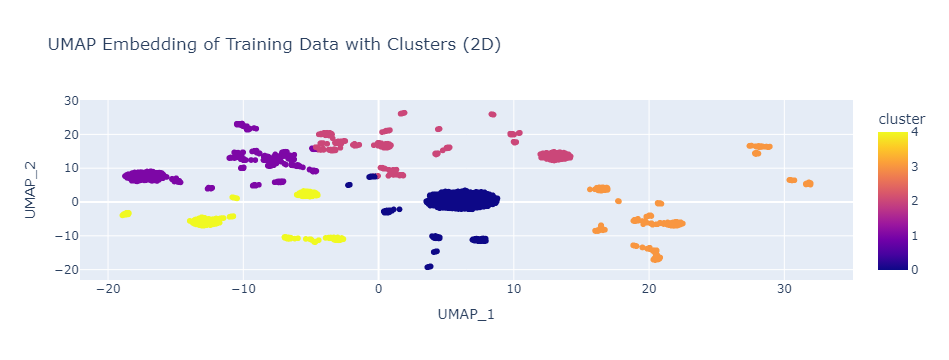

In [23]:
# Aplicar UMAP
trans = umap.UMAP(n_neighbors=10, n_components=2, min_dist=0.5, metric='cosine', random_state=42)
umap_embedding_train = trans.fit_transform(X_train)

# Aplicar KMeans para realizar el clustering en el espacio embebido por UMAP
kmeans = KMeans(n_clusters=5, random_state=42)  # Puedes ajustar el número de clusters según sea necesario
clusters = kmeans.fit_predict(umap_embedding_train)

# Agregar una columna para indicar el clúster
umap_df_train = pd.DataFrame(umap_embedding_train, columns=['UMAP_1', 'UMAP_2'])
umap_df_train['cluster'] = clusters
umap_df_train['genus_species'] = df_training['genus'] + '_' + df_training['species']
umap_df_train['phenotype'] = df_training['phenotype']

# Guardar los datos del embedding de UMAP en 2D con la información de los clústeres en un archivo CSV
umap_df_train.to_csv(os.path.join(embedding_output_folder, "umap_embedding_with_clusters_2d.csv"), index=False)

# Visualizar los datos embebidos con UMAP en 2D y colores que representan los diferentes clústeres
fig_2d = px.scatter(
    umap_df_train, 
    x='UMAP_1', 
    y='UMAP_2', 
    color='cluster',
    hover_data=['genus_species', 'phenotype'],
    title='UMAP Embedding of Training Data with Clusters (2D)'
)
fig_2d.show()

/opt/conda/lib/python3.11/site-packages/scipy/sparse/_index.py:145: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



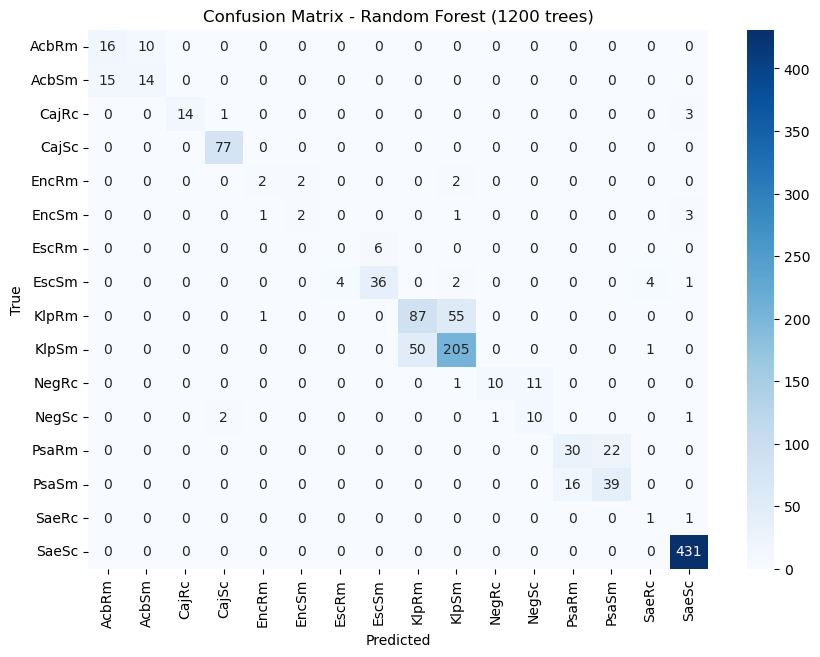

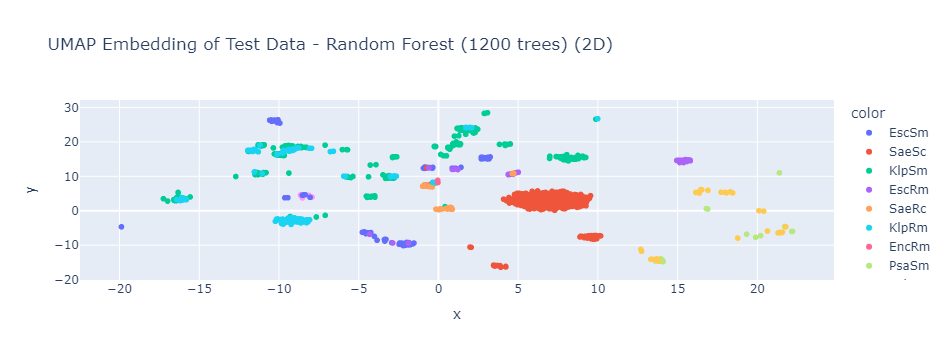

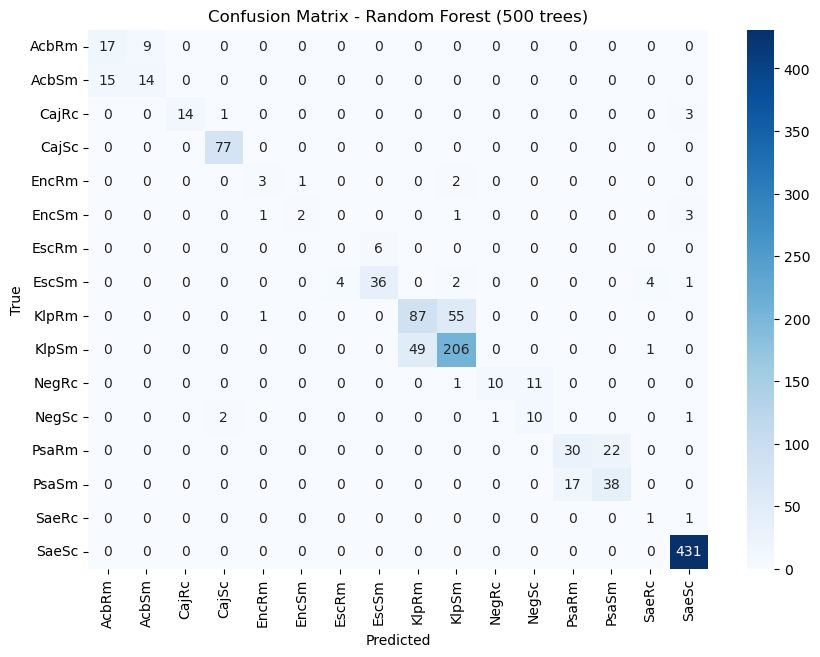

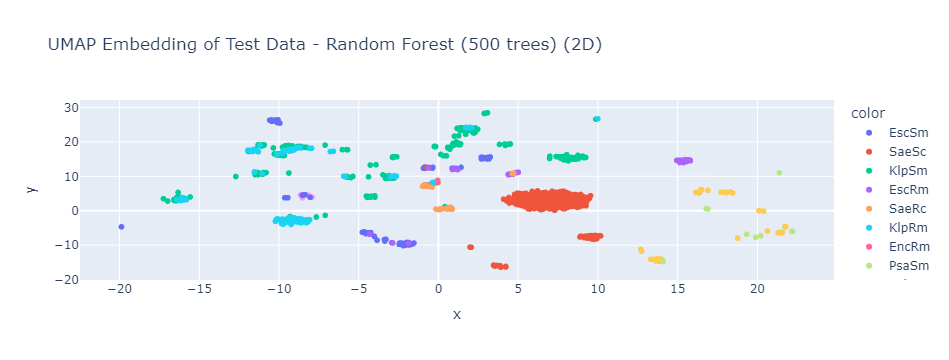

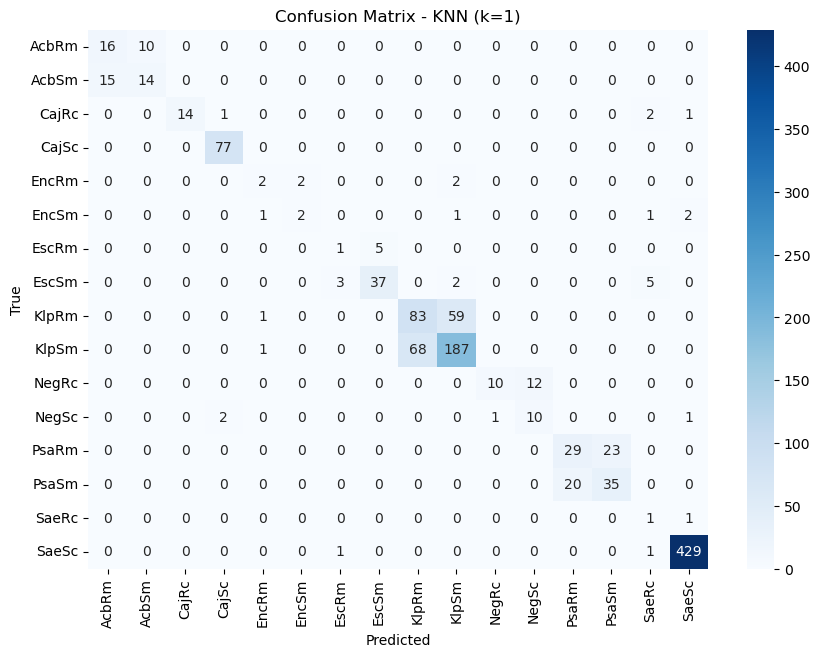

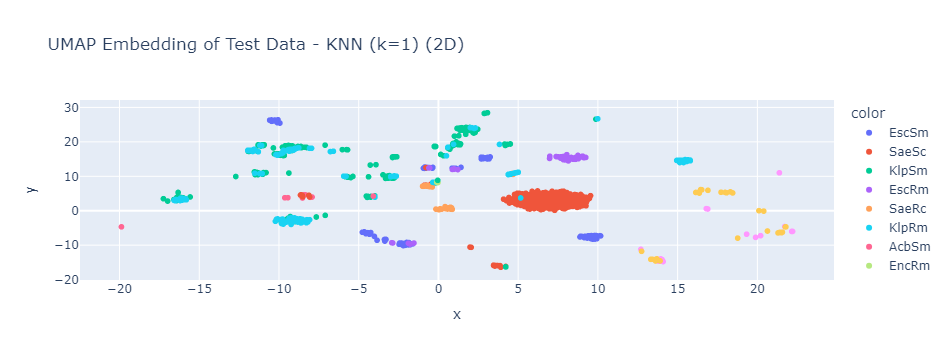

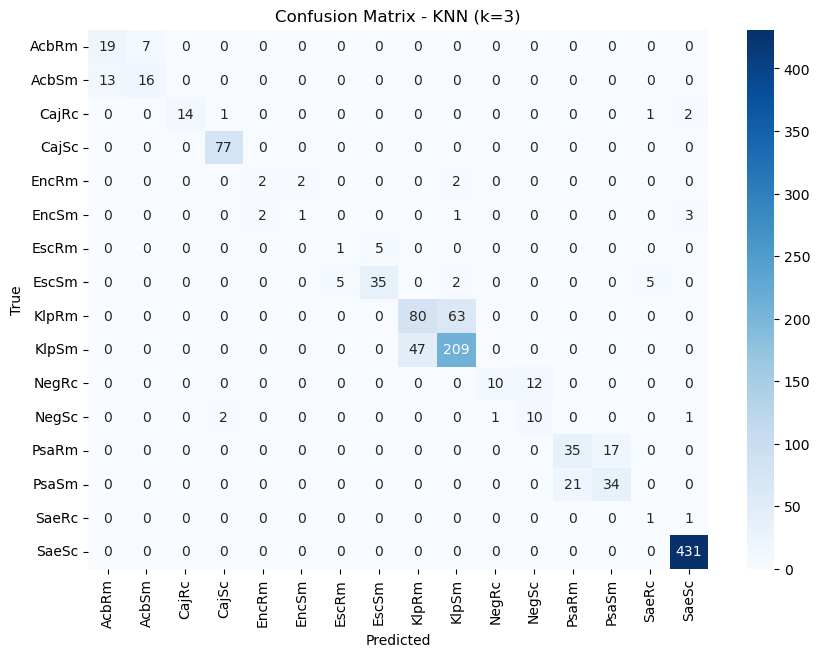

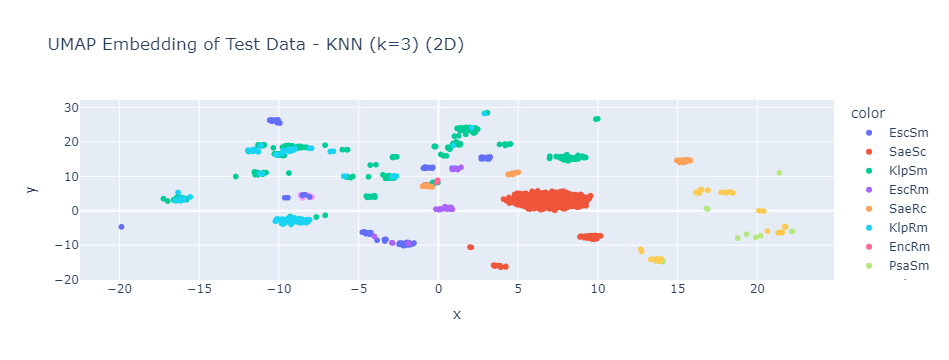

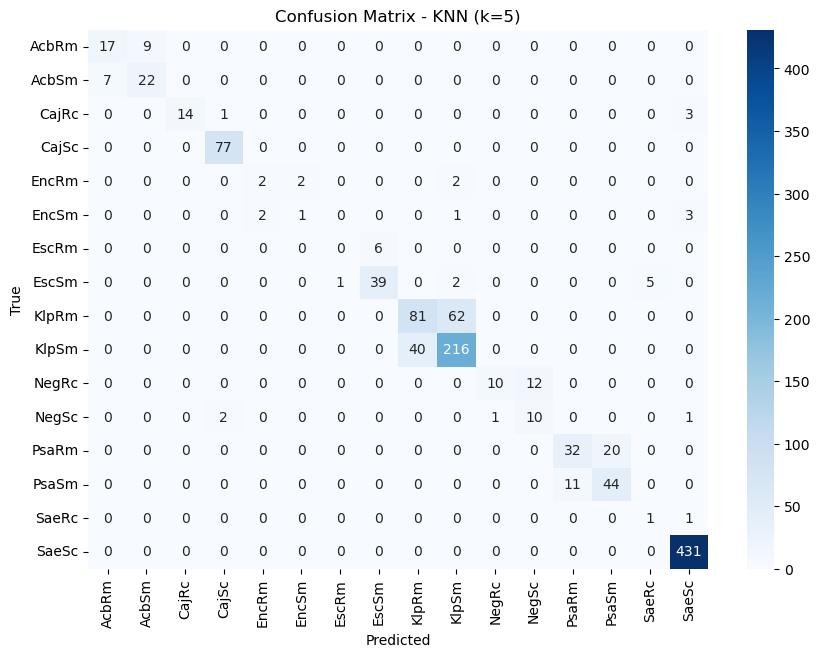

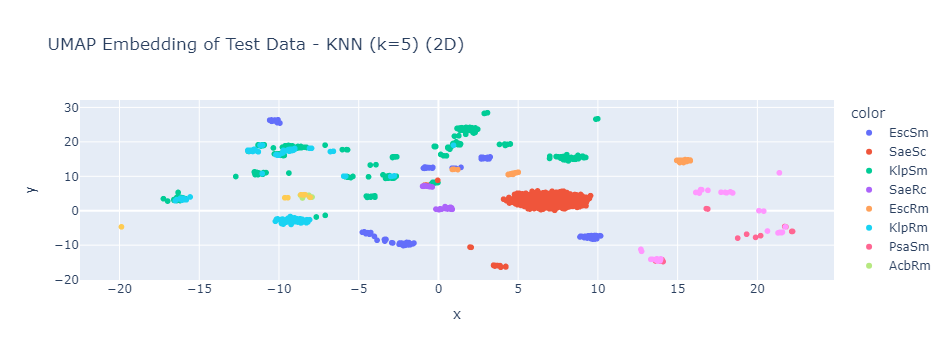

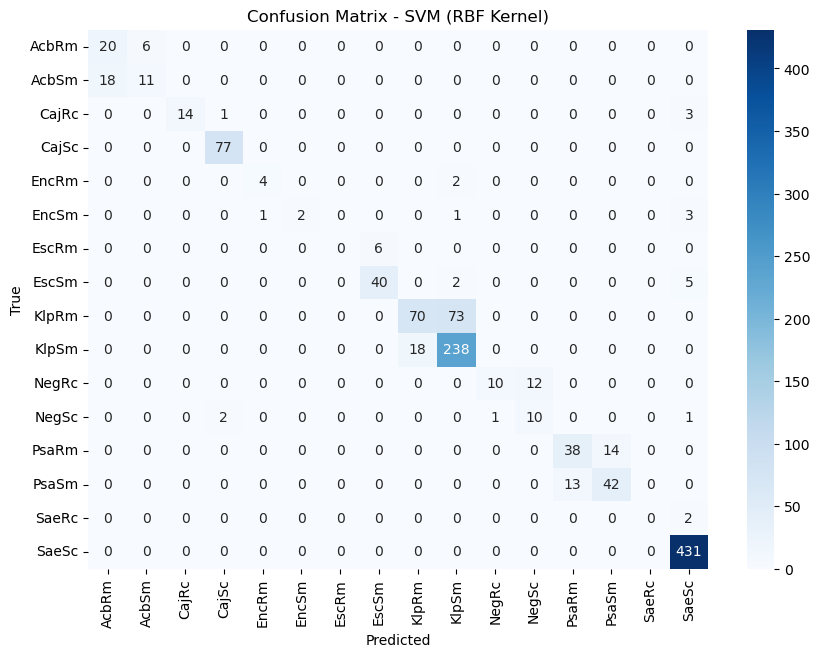

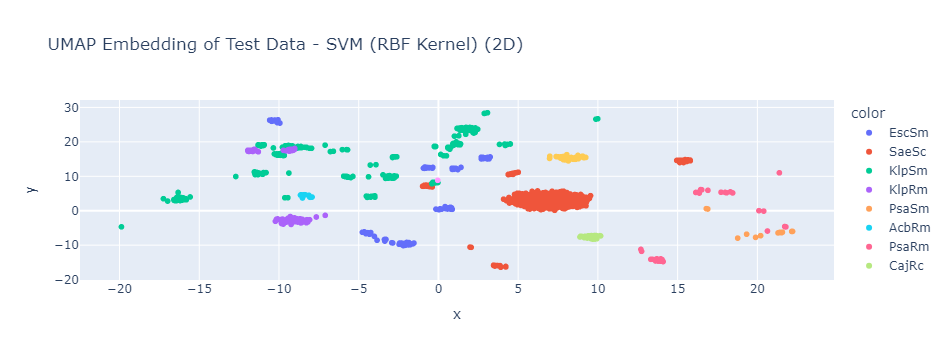

                            accuracy  f1_score  \
Random Forest (1200 trees)  0.817800  0.815533   
Random Forest (500 trees)   0.819479  0.817232   
KNN (k=1)                   0.795130  0.796446   
KNN (k=3)                   0.818640  0.816417   
KNN (k=5)                   0.837112  0.832204   
SVM (RBF Kernel)            0.845508  0.834776   

                                                             confusion_matrix  
Random Forest (1200 trees)  [[16, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
Random Forest (500 trees)   [[17, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...  
KNN (k=1)                   [[16, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
KNN (k=3)                   [[19, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...  
KNN (k=5)                   [[17, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...  
SVM (RBF Kernel)            [[20, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...  


In [17]:
# Definir algoritmos a usar
algorithms = {
    "Random Forest (1200 trees)": RandomForestClassifier(n_estimators=1200, random_state=42),
    "Random Forest (500 trees)": RandomForestClassifier(n_estimators=500, random_state=42),
    "KNN (k=1)": KNeighborsClassifier(n_neighbors=1),
    "KNN (k=3)": KNeighborsClassifier(n_neighbors=3),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "SVM (RBF Kernel)": SVC(kernel='rbf', gamma='auto', C=1, random_state=42),
}

results = {}
test_embedding = trans.transform(X_test)

for algo_name, algo in algorithms.items():
    # Entrenar el modelo
    algo.fit(trans.embedding_, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = algo.predict(test_embedding)

    # Calcular métricas de evaluación
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
     # Almacenar resultados
    results[algo_name] = {'accuracy': accuracy, 'f1_score': f1, 'confusion_matrix': cm}

    # Graficar y guardar la matriz de confusión
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {algo_name}')
    plt.savefig(os.path.join(output_folder, algo_name + "_confusion_matrix.png"))
    plt.show()

    # Verificar si df_filtrado_test no está vacío antes de transformar y predecir
    if not df_filtrado_test.empty:
        # Realizar predicciones en df_test
        tests_embedding = trans.transform(df_filtrado_test)
        test_predictions = algo.predict(tests_embedding)

 # Guardar las predicciones en un archivo CSV
        test_predictions_labels = label_encoder.inverse_transform(test_predictions)
        test_predictions_df = pd.DataFrame({
            'genus': df_test.genus,
            'species': df_test.species,
            'accession': df_test.accession,
            'antibiotic': df_test.antibiotic,
            'status': test_predictions_labels
        })
        test_predictions_df.to_csv(os.path.join(output_folder, algo_name + "_test_predictions.csv"), index=False)

        # Visualizar las predicciones en el espacio embebido por UMAP en 2D
        fig_test = px.scatter(
            x=tests_embedding[:, 0], 
            y=tests_embedding[:, 1], 
            color=test_predictions_labels,
            title=f'UMAP Embedding of Test Data - {algo_name} (2D)'
        )
        fig_test.show()

# Guardar los resultados generales en un CSV
results_df_test = pd.DataFrame.from_dict(results, orient='index')
results_df_test.to_csv(os.path.join(output_folder, "overall_results.csv"))

print(results_df_test)
